In this project I will use CNN+Embedding layer to predict the semtiment of movie reviews

Networks with convolutional and pooling layers are useful for classification tasks in
which we expect to and strong local clues regarding class membership, but these
clues can appear in different places in the input.We would like to learn that
certain sequences of words are good indicators of the topic, and do not necessarily
care where they appear in the document. Convolutional and pooling layers allow
the model to learn to and such local indicators, regardless of their position.

## Model Architecture

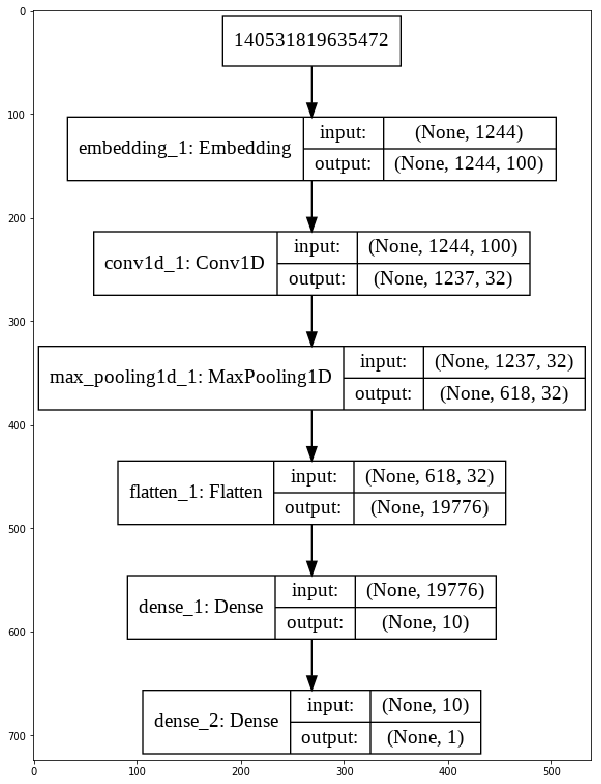

In [4]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10,15))
image = plt.imread('CNN+Embedding_model.png')
plt.imshow(image)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = 'drive/My Drive/txt_sentoken/'

In [3]:
import string
import re
from os import listdir
from numpy import array
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Using TensorFlow backend.


In [0]:
# load doc into memory
def load_doc(filename):
# open the file as read only
  file = open(filename, 'r')
# read all text
  text = file.read()
# close the file
  file.close()
  return text

In [0]:
# turn a document into clean tokens
def clean_doc(doc, vocab):
# split into tokens by white space
  tokens = doc.split()
# prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
  tokens = [re_punc.sub('', w) for w in tokens]
# filter out tokens not in vocab
  tokens = [w for w in tokens if w in vocab]
  tokens = ' '.join(tokens)
  return tokens

In [0]:
# load all documents in a directory and process them using the above clean_doc function,depending on the argument is_train,train and test documents will be processed
def process_docs(directory, vocab, is_train):
  documents = list()
# walk through all files in the folder
  for filename in listdir(directory):
# skip any reviews in the test set
    if is_train and filename.startswith('cv9'):
      continue
    if not is_train and not filename.startswith('cv9'):
      continue
# create the full path of the file to open
    path = directory + '/' + filename
# load the doc
    doc = load_doc(path)
# clean doc
    tokens = clean_doc(doc, vocab)
# add to list
    documents.append(tokens)
  return documents

In [0]:
# load and clean a dataset according the vocabulary provided
def load_clean_dataset(vocab, is_train):
# load documents
  neg = process_docs(path+'neg', vocab, is_train)
  pos = process_docs(path+'pos', vocab, is_train)
  docs = neg + pos

  # prepare labels
  labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
  return docs, labels

In [0]:
# fit a tokenizer
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [0]:
# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
# integer encode
  encoded = tokenizer.texts_to_sequences(docs)
# pad sequences
  padded = pad_sequences(encoded, maxlen=max_length, padding='post')
  return padded

In [0]:
# define the model
def define_model(vocab_size, max_length):
  model = Sequential()
  model.add(Embedding(vocab_size, 100, input_length=max_length))
  model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
#compile network
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# summarize defined model
  model.summary()
  plot_model(model, to_file='CNN+Embedding_model.png', show_shapes=True)
  
  return model

In [0]:
# load the vocabulary
vocab_filename = path+'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

In [0]:
# load training data
train_docs, ytrain = load_clean_dataset(vocab, True)

In [13]:
print(len(train_docs),len(ytrain))

(1809, 1809)


In [14]:
# create the tokenizer
tokenizer = create_tokenizer(train_docs)

# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)

# calculate the maximum sequence length
max_length = max([len(s.split()) for s in train_docs])
print('Maximum length: %d' % max_length)

Vocabulary size: 14815
Maximum length: 1244


In [15]:
# encode data
Xtrain = encode_docs(tokenizer, max_length, train_docs)
# define model
model = define_model(vocab_size, max_length)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1244, 100)         1481500   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1237, 32)          25632     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 618, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 19776)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                197770    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,704,913
Trainable params: 1,704,913
Non-trainable para

In [16]:
# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1809/1809 [==============================] - 17s 9ms/step - loss: 0.6888 - acc: 0.5417
Epoch 2/10
1809/1809 [==============================] - 16s 9ms/step - loss: 0.5137 - acc: 0.7916
Epoch 3/10
1809/1809 [==============================] - 16s 9ms/step - loss: 0.1052 - acc: 0.9690
Epoch 4/10
1809/1809 [==============================] - 16s 9ms/step - loss: 0.0102 - acc: 0.9994
Epoch 5/10
1809/1809 [==============================] - 17s 9ms/step - loss: 0.0029 - acc: 1.0000
Epoch 6/10
1809/1809 [==============================] - 17s 9ms/step - loss: 0.0014 - acc: 1.0000
Epoch 7/10
1809/1809 [==============================] - 16s 9ms/step - loss: 4.6906e-04 - acc: 1.0000
Epoch 8/10
1809/1809 [==============================] - 16s 9ms/step - loss: 2.3468e-04 - acc: 1.0000
Epoch 9/10
1809/1809 [==============================] - 16s 9ms/step - loss: 1.3315e-04 - acc: 1.0000
Epoch 10/10
1809/1809 [==============================] - 1

In [0]:
# save the model
model.save('CNN+EMbedding-model.h5')

In [0]:
# load the model
model = load_model('CNN+EMbedding-model.h5')

In [19]:
!readlink -f model.h5

/content/model.h5


In [0]:
#from google.colab import files
#with open('example.txt', 'w') as f:
#f.write('some content')
#files.download('example.txt')

In [0]:
# load training data
test_docs, ytest = load_clean_dataset(vocab, False)


In [22]:
print(len(test_docs),len(ytest))

(200, 200)


In [0]:
# encode data
Xtest = encode_docs(tokenizer, max_length, test_docs)

In [24]:
# evaluate model on training dataset
_, acc = model.evaluate(Xtrain, ytrain, verbose=0)
print('Train Accuracy: %f' % (acc*100))
# evaluate model on test dataset
_, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Train Accuracy: 100.000000
Test Accuracy: 88.000000


In [0]:
# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, max_length, model):
# clean review
  line = clean_doc(review, vocab)

  # encode and pad review
  padded = encode_docs(tokenizer, max_length, [line])

  # predict sentiment
  yhat = model.predict(padded, verbose=0)
  
  # retrieve predicted percentage and label
  percent_pos = yhat[0,0]
  if round(percent_pos) == 0:
    return (1-percent_pos), 'NEGATIVE'
  return percent_pos, 'POSITIVE'

In [27]:
text = 'This is a bad movie. Do not watch it. It sucks.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, max_length, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

Review: [This is a bad movie. Do not watch it. It sucks.]
Sentiment: NEGATIVE (97.370%)
